In [1]:
import pandas as pd

# Load the datasets
data_2022 = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2022.csv')
data_2023 = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2023__Larger_.csv')
data_2024 = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2024__up_to_yesterday_.csv')

# Display the first few rows of each dataset to understand the structure
print("2022 Data Sample:")
display(data_2022.head())

print("2023 Data Sample:")
display(data_2023.head())

print("2024 Data Sample:")
display(data_2024.head())

# Combine datasets for processing
combined_data = pd.concat([data_2022, data_2023, data_2024], ignore_index=True)

# Check for missing values and data types
print(combined_data.info())


2022 Data Sample:


,Date,Time,Type of Crime,Suburb,Victim Gender
0,2022-01-01,18:12,Burglary,Carlton,Male
1,2022-01-01,20:45,Theft,Collingwood,Female
2,2022-01-01,20:05,Assault,Carlton,Female
3,2022-01-01,22:40,Public Disorder,Footscray,Female
4,2022-01-01,05:25,Burglary,Richmond,Male


2023 Data Sample:


,Date,Time,Type of Crime,Suburb,Victim Gender
0,2023-01-01,11:29,Theft,Carlton,Male
1,2023-01-01,08:08,Robbery,Carlton,Female
2,2023-01-01,22:39,Robbery,South Yarra,Female
3,2023-01-01,00:54,Theft,Brunswick,Female
4,2023-01-01,14:02,Public Disorder,North Melbourne,Male


2024 Data Sample:


,Date,Time,Type of Crime,Suburb,Victim Gender
0,2024-01-01,15:40,Burglary,Collingwood,Female
1,2024-01-01,20:46,Vandalism,Fitzroy,Female
2,2024-01-01,09:16,Theft,North Melbourne,Female
3,2024-01-01,13:15,Fraud,Richmond,Male
4,2024-01-01,06:33,Vehicle Theft,South Yarra,Female


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           4000 non-null   object
 1   Time           4000 non-null   object
 2   Type of Crime  4000 non-null   object
 3   Suburb         4000 non-null   object
 4   Victim Gender  4000 non-null   object
dtypes: object(5)
memory usage: 156.4+ KB
None


In [6]:
# Ensure 'Date' column is in datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')

# Handle inconsistent time formats by letting Pandas infer the format
combined_data['Time'] = pd.to_datetime(combined_data['Time'], errors='coerce').dt.time

# Create the 'Hour' feature correctly
combined_data['Hour'] = pd.to_datetime(combined_data['Time'].astype(str), errors='coerce').dt.hour

# Now that 'Date' is confirmed as a datetime object, we can use .dt for feature extraction
combined_data['DayOfWeek'] = combined_data['Date'].dt.dayofweek  # Monday=0, Sunday=6
combined_data['Month'] = combined_data['Date'].dt.month

# Encode categorical variables (Type of Crime, Suburb, Victim Gender) using one-hot encoding
encoded_data = pd.get_dummies(combined_data, columns=['Type of Crime', 'Suburb', 'Victim Gender'], drop_first=True)

# Display the processed dataset (you can use print or display functions depending on your environment)
encoded_data.head()

,Date,Time,Hour,DayOfWeek,Month,Type of Crime_Burglary,Type of Crime_Domestic Violence,Type of Crime_Drug-related,Type of Crime_Fraud,Type of Crime_Public Disorder,...,Suburb_Carlton,Suburb_Collingwood,Suburb_Fitzroy,Suburb_Footscray,Suburb_Melbourne CBD,Suburb_North Melbourne,Suburb_Richmond,Suburb_South Yarra,Suburb_St Kilda,Victim Gender_Male
0,2022-01-01,NaT,NaN,5,1,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,2022-01-01,NaT,NaN,5,1,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2022-01-01,NaT,NaN,5,1,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,2022-01-01,NaT,NaN,5,1,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,2022-01-01,NaT,NaN,5,1,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [14]:
# Check for numeric columns and missing values
print("Numeric Columns with Missing Values:")
print(numeric_columns_with_na)

# Check if the columns have missing values
print("Columns with Missing Values:")
print(X.isna().sum())


Numeric Columns with Missing Values:
Index(['Hour'], dtype='object')
Columns with Missing Values:
Hour                      4000
DayOfWeek                    0
Month                        0
Suburb_Carlton               0
Suburb_Collingwood           0
Suburb_Fitzroy               0
Suburb_Footscray             0
Suburb_Melbourne CBD         0
Suburb_North Melbourne       0
Suburb_Richmond              0
Suburb_South Yarra           0
Suburb_St Kilda              0
Victim Gender_Male           0
dtype: int64


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Reload the dataset
data = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2022.csv')
data = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2023__Larger_.csv')
data = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2024__up_to_yesterday_.csv')


# Filter data for 'Assault' and 'Female'
filtered_data = data[(data['Type of Crime'] == 'Assault') & (data['Victim Gender'] == 'Female')]

# Extract the Hour from the 'Time' column and ensure it's correctly formatted
filtered_data['Hour'] = pd.to_datetime(filtered_data['Time'], format='%H:%M').dt.hour

# One-Hot Encode categorical variables (since we only have 'Suburb' now)
filtered_data_encoded = pd.get_dummies(filtered_data, columns=['Suburb'], drop_first=True)

# Define features (X) and target (y)
X = filtered_data_encoded.drop(columns=['Date', 'Time', 'Type of Crime', 'Victim Gender'])  # Drop unnecessary columns
y = filtered_data_encoded['Type of Crime']  # The target will be 'Assault'

# Impute missing values in numeric columns with the mean and categorical columns with the most frequent value
numeric_imputer = SimpleImputer(strategy='mean')

# Select numeric columns (since categorical columns are already one-hot encoded)
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Impute numeric columns if any have missing values
if len(numeric_columns) > 0 and X[numeric_columns].isna().any().any():
    X[numeric_columns] = pd.DataFrame(numeric_imputer.fit_transform(X[numeric_columns]), columns=numeric_columns, index=X.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()
svc_clf = SVC()

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(classification_report(y_test, y_pred_log_reg))

# Train Random Forest
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc}")
print(classification_report(y_test, y_pred_rf))

# Train Support Vector Machine
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {svc_acc}")
print(classification_report(y_test, y_pred_svc))

/var/folders/wv/5z92grgj3tx48dknqt9v9v140000gn/T/ipykernel_62237/2785908607.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hour'] = pd.to_datetime(filtered_data['Time'], format='%H:%M').dt.hour


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Assault'

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Reload the dataset
data = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2022.csv')
data = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2023__Larger_.csv')
data = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2024__up_to_yesterday_.csv')
# Extract the Hour from the 'Time' column and ensure it's correctly formatted
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

# One-Hot Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Suburb', 'Victim Gender'], drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop(columns=['Date', 'Time', 'Type of Crime'])  # Drop unnecessary columns
y = data_encoded['Type of Crime']  # Assuming 'Type of Crime' is the target

# Impute missing values in numeric columns with the mean and categorical columns with the most frequent value
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Select numeric and categorical columns that have missing values
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object', 'bool']).columns

# Impute numeric columns if any have missing values
if len(numeric_columns) > 0 and X[numeric_columns].isna().any().any():
    X[numeric_columns] = pd.DataFrame(numeric_imputer.fit_transform(X[numeric_columns]), columns=numeric_columns, index=X.index)

# Impute categorical columns if any have missing values
if len(categorical_columns) > 0 and X[categorical_columns].isna().any().any():
    X[categorical_columns] = pd.DataFrame(categorical_imputer.fit_transform(X[categorical_columns]), columns=categorical_columns, index=X.index)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()
svc_clf = SVC()

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(classification_report(y_test, y_pred_log_reg))

# Train Random Forest
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc}")
print(classification_report(y_test, y_pred_rf))

# Train Support Vector Machine
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {svc_acc}")
print(classification_report(y_test, y_pred_svc))


Logistic Regression Accuracy: 0.1
                   precision    recall  f1-score   support

          Assault       0.00      0.00      0.00        29
         Burglary       0.07      0.09      0.08        11
Domestic Violence       0.10      0.07      0.08        15
     Drug-related       0.12      0.19      0.14        16
            Fraud       0.15      0.40      0.22        25
  Public Disorder       0.00      0.00      0.00        11
          Robbery       0.11      0.15      0.12        20
            Theft       0.00      0.00      0.00        26
        Vandalism       0.08      0.03      0.05        31
    Vehicle Theft       0.06      0.06      0.06        16

         accuracy                           0.10       200
        macro avg       0.07      0.10      0.07       200
     weighted avg       0.07      0.10      0.07       200

Random Forest Accuracy: 0.1
                   precision    recall  f1-score   support

          Assault       0.00      0.00      0.00 

/Users/nj/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nj/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nj/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Check for data integrity
print(f"Data shape: {data.shape}")
print(data['Type of Crime'].value_counts())  # Check the distribution of crime types
print(data.head())  # Look at the first few rows to ensure the data looks as expected

Data shape: (1000, 5)
Type of Crime
Fraud                134
Vandalism            108
Drug-related         107
Assault              102
Robbery              100
Domestic Violence     94
Public Disorder       92
Vehicle Theft         91
Theft                 87
Burglary              85
Name: count, dtype: int64
         Date   Time  Type of Crime           Suburb Victim Gender
0  2024-01-01  15:40       Burglary      Collingwood        Female
1  2024-01-01  20:46      Vandalism          Fitzroy        Female
2  2024-01-01  09:16          Theft  North Melbourne        Female
3  2024-01-01  13:15          Fraud         Richmond          Male
4  2024-01-01  06:33  Vehicle Theft      South Yarra        Female


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Reload the dataset
data = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2022.csv')
data = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2023__Larger_.csv')
data = pd.read_csv('/Users/nj/Desktop/SIT764 - Capstone Team Project A/UseCase5 - Analysis of Health Behavior/Mock_Melbourne_Crime_Data_2024__up_to_yesterday_.csv')

# Filter data to include only relevant features
filtered_data = data

# Feature Engineering: Extract day of the week and hour from Date and Time
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
filtered_data['day_of_week'] = filtered_data['Date'].dt.dayofweek  # Monday=0, Sunday=6
filtered_data['month'] = filtered_data['Date'].dt.month  # Month as a feature
filtered_data['hour_of_day'] = pd.to_datetime(filtered_data['Time'], format='%H:%M').dt.hour  # Extract hour
filtered_data['is_weekend'] = filtered_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Is it a weekend?

# One-hot encode categorical features like 'Suburb'
filtered_data_encoded = pd.get_dummies(filtered_data, columns=['Suburb', 'Victim Gender'], drop_first=True)

# Define features (X) and target (y)
X = filtered_data_encoded.drop(columns=['Date', 'Time', 'Type of Crime'])  # Drop unnecessary columns
y = (filtered_data_encoded['Type of Crime'] == 'Assault').astype(int)  # Binary classification for Assault

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with class weighting
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predictions and accuracy
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.535
              precision    recall  f1-score   support

           0       0.84      0.56      0.67       171
           1       0.13      0.38      0.19        29

    accuracy                           0.54       200
   macro avg       0.49      0.47      0.43       200
weighted avg       0.74      0.54      0.60       200



In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Different solvers
}

# Initialize GridSearchCV for Logistic Regression
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# Retrain the model with the best parameters
best_log_reg = grid_search.best_estimator_
y_pred_best = best_log_reg.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_best)
print(f"Logistic Regression Accuracy after tuning: {best_acc}")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Accuracy: 0.575
Logistic Regression Accuracy after tuning: 0.53
              precision    recall  f1-score   support

           0       0.84      0.56      0.67       171
           1       0.13      0.38      0.19        29

    accuracy                           0.53       200
   macro avg       0.48      0.47      0.43       200
weighted avg       0.74      0.53      0.60       200



In [27]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Retrain Logistic Regression with polynomial features
log_reg_poly = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_poly.fit(X_poly_train, y_train)

# Predictions and accuracy
y_pred_poly = log_reg_poly.predict(X_poly_test)
poly_acc = accuracy_score(y_test, y_pred_poly)
print(f"Logistic Regression Accuracy with polynomial features: {poly_acc}")
print(classification_report(y_test, y_pred_poly))

Logistic Regression Accuracy with polynomial features: 0.61
              precision    recall  f1-score   support

           0       0.86      0.65      0.74       171
           1       0.15      0.38      0.22        29

    accuracy                           0.61       200
   macro avg       0.51      0.51      0.48       200
weighted avg       0.76      0.61      0.66       200



/Users/nj/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Train Random Forest with more trees (n_estimators)
rf_clf = RandomForestClassifier(n_estimators=200, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Predictions and accuracy
y_pred_rf = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy with more trees: {rf_acc}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy with more trees: 0.845
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       171
           1       0.00      0.00      0.00        29

    accuracy                           0.84       200
   macro avg       0.43      0.49      0.46       200
weighted avg       0.73      0.84      0.78       200



In [29]:
import numpy as np

# Define a function to predict the safety level
def predict_safety_level(suburb, time):
    # Format the time to extract the hour
    hour = pd.to_datetime(time, format='%H:%M').hour
    
    # Create a new input DataFrame with the given suburb and time
    input_data = pd.DataFrame({
        'hour_of_day': [hour],
        'is_weekend': [1 if pd.to_datetime(time).dayofweek >= 5 else 0]
    })
    
    # Add dummy columns for all suburbs (matching the columns in the training data)
    for col in X.columns:
        if col.startswith('Suburb_'):
            input_data[col] = 0  # Set all suburb columns to 0
    
    # Set the corresponding suburb column to 1
    suburb_col = f"Suburb_{suburb}"
    if suburb_col in input_data.columns:
        input_data[suburb_col] = 1
    else:
        raise ValueError(f"Suburb '{suburb}' is not found in the data.")
    
    # Ensure all necessary features are in place
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    
    # Predict the probability of an assault
    probability = best_log_reg.predict_proba(input_data)[0][1]  # Prob of class 1 (Assault)
    
    # Map probability to safety level
    if probability < 0.3:
        safety_level = "High"
    elif 0.3 <= probability < 0.6:
        safety_level = "Medium"
    else:
        safety_level = "Low"
    
    return safety_level, probability

# Example Usage:
suburb = "Carlton"
time = "21:30"  # Input time
safety_level, probability = predict_safety_level(suburb, time)
print(f"Predicted Safety Level for {suburb} at {time}: {safety_level} (Assault Probability: {probability:.2f})")

Predicted Safety Level for Carlton at 21:30: Medium (Assault Probability: 0.49)


In [31]:
import pandas as pd
import numpy as np

# Assuming best_log_reg is your trained Logistic Regression model

# Define a function to predict the safety level
def predict_safety_level(suburb, time):
    # Format the time to extract the hour
    hour = pd.to_datetime(time, format='%H:%M').hour
    
    # Create a new input DataFrame with the given suburb and time
    input_data = pd.DataFrame({
        'hour_of_day': [hour],
        'is_weekend': [1 if pd.to_datetime(time).dayofweek >= 5 else 0]
    })
    
    # Add dummy columns for all suburbs (matching the columns in the training data)
    for col in X.columns:
        if col.startswith('Suburb_'):
            input_data[col] = 0  # Set all suburb columns to 0
    
    # Set the corresponding suburb column to 1
    suburb_col = f"Suburb_{suburb}"
    if suburb_col in input_data.columns:
        input_data[suburb_col] = 1
    else:
        raise ValueError(f"Suburb '{suburb}' is not found in the data.")
    
    # Ensure all necessary features are in place
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    
    # Predict the probability of an assault
    probability = best_log_reg.predict_proba(input_data)[0][1]  # Prob of class 1 (Assault)
    
    # Map probability to safety level
    if probability < 0.3:
        safety_level = "High"
    elif 0.3 <= probability < 0.6:
        safety_level = "Medium"
    else:
        safety_level = "Low"
    
    return safety_level, probability

# Create a user input loop
def get_safety_prediction():
    suburb = input("Enter the suburb: ")  # User input for suburb
    time = input("Enter the time (HH:MM format): ")  # User input for time
    try:
        # Call the safety prediction function
        safety_level, probability = predict_safety_level(suburb, time)
        print(f"\nPredicted Safety Level for {suburb} at {time}: {safety_level} (Assault Probability: {probability:.2f})")
    except ValueError as e:
        print(e)

# Call the input function
get_safety_prediction()


Predicted Safety Level for St Kilda at 19:30: Medium (Assault Probability: 0.44)


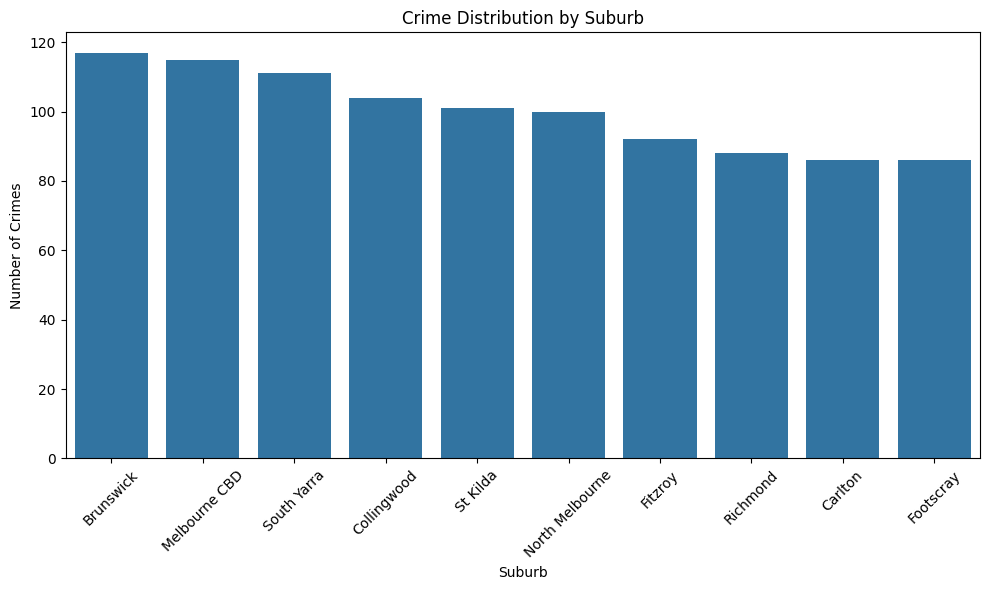

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crime distribution by suburb
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Suburb', order=data['Suburb'].value_counts().index)
plt.title('Crime Distribution by Suburb')
plt.xticks(rotation=45)
plt.xlabel('Suburb')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

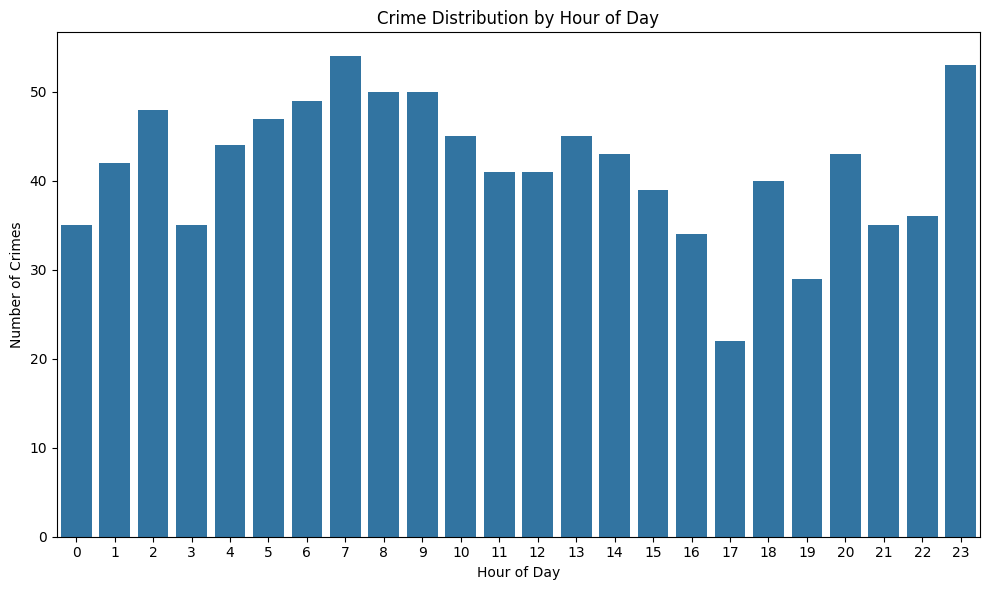

In [33]:
# Crime distribution by hour
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='hour_of_day')
plt.title('Crime Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

In [34]:
# Generate safety predictions for the entire dataset
safety_levels = []
for i, row in filtered_data.iterrows():
    suburb = row['Suburb']
    time = row['Time']
    safety_level, _ = predict_safety_level(suburb, time)
    safety_levels.append(safety_level)

# Add safety levels to the dataframe
filtered_data['Safety Level'] = safety_levels

# Visualize safety level distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_data, x='Safety Level', order=['High', 'Medium', 'Low'])
plt.title('Safety Level Distribution')
plt.xlabel('Safety Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

ValueError: Suburb 'Brunswick' is not found in the data.

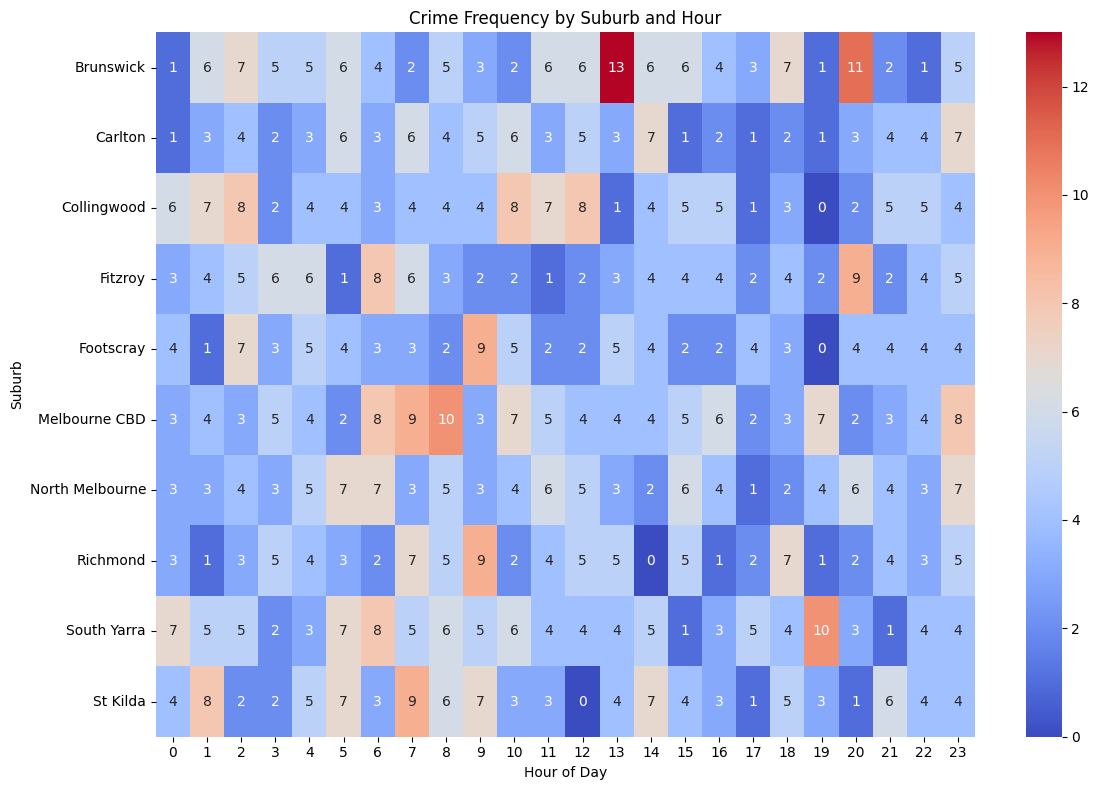

In [35]:
# Create a pivot table for the heatmap
heatmap_data = filtered_data.pivot_table(index='Suburb', columns='hour_of_day', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt="d")
plt.title('Crime Frequency by Suburb and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Suburb')
plt.tight_layout()
plt.show()

In [38]:
# Generate safety predictions for each row in the dataset
safety_levels = []
for i, row in filtered_data.iterrows():
    suburb = row['Suburb']
    time = row['Time']
    
    # Try block to handle missing suburbs
    try:
        safety_level, _ = predict_safety_level(suburb, time)
        safety_levels.append(safety_level)
    except ValueError as e:
        print(e)
        safety_levels.append('Unknown')  # Handle unknown suburbs gracefully

# Add the Safety Level column to the dataset
filtered_data['Safety Level'] = safety_levels

Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Brunswick' is not found in the data.
Suburb 'Br

In [39]:
def predict_safety_level(suburb, time):
    # Format the time to extract the hour
    hour = pd.to_datetime(time, format='%H:%M').hour
    
    # Create a new input DataFrame with the given suburb and time
    input_data = pd.DataFrame({
        'hour_of_day': [hour],
        'is_weekend': [1 if pd.to_datetime(time).dayofweek >= 5 else 0]
    })
    
    # Add dummy columns for all suburbs (matching the columns in the training data)
    for col in X.columns:
        if col.startswith('Suburb_'):
            input_data[col] = 0  # Set all suburb columns to 0
    
    # Set the corresponding suburb column to 1, or add a new column dynamically
    suburb_col = f"Suburb_{suburb}"
    if suburb_col in input_data.columns:
        input_data[suburb_col] = 1
    else:
        # Dynamically add a new column for missing suburbs
        print(f"Suburb '{suburb}' is not found in training data. Adding dynamically.")
        input_data[suburb_col] = 1
    
    # Ensure all necessary features are in place
    input_data = input_data.reindex(columns=X.columns, fill_value=0)
    
    # Predict the probability of an assault
    probability = best_log_reg.predict_proba(input_data)[0][1]  # Prob of class 1 (Assault)
    
    # Map probability to safety level
    if probability < 0.3:
        safety_level = "High"
    elif 0.3 <= probability < 0.6:
        safety_level = "Medium"
    else:
        safety_level = "Low"
    
    return safety_level, probability

In [40]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(best_log_reg, 'crime_prediction_LR.pkl')

# Save the columns used for training (features)
joblib.dump(X.columns, 'mod')

print("Model and feature columns saved successfully!")


Model and feature columns saved successfully!
